In [2]:
from dotenv import load_dotenv
load_dotenv("C:\\Users\\praka\\Documents\\ML Hands-on\\.env")
import os
from langchain_openai import ChatOpenAI

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.3-70b-versatile")
result=llm.invoke("Hello")
result


AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.010025298, 'prompt_time': 0.011058559, 'queue_time': 0.233797315, 'total_time': 0.021083857}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e6df77c-3422-4ceb-94d5-986c4fc37f6d-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

### We Will start With Creating Nodes

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

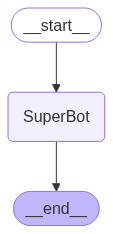

In [5]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='d0a82421-ab14-443b-b481-ed4582ccec3e'),
  AIMessage(content="Hello Krish, nice to meet you. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you a fan of international cricket, IPL, or do you enjoy playing the game yourself?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 45, 'total_tokens': 91, 'completion_time': 0.143405774, 'prompt_time': 0.011282683, 'queue_time': 0.194796391, 'total_time': 0.154688457}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c1bf8d8b-530f-477c-8c90-0d6969d3d090-0', usage_metadata={'input_tokens': 45, 'output_tokens': 46, 'total_tokens': 91})]}

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.


#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},
                                  config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Krish, nice to meet you. Cricket is a fantastic sport, isn't it? What's your favorite team or player? Do you play cricket yourself or just enjoy watching it?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 45, 'total_tokens': 83, 'completion_time': 0.880418328, 'prompt_time': 0.012394496, 'queue_time': 0.21118231, 'total_time': 0.892812824}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--30383d92-7761-4d95-a32c-98e3bbd51192-0', usage_metadata={'input_tokens': 45, 'output_tokens': 38, 'total_tokens': 83})]}}


In [10]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a72ff2d7-cb57-453d-b805-55cbc756b58b'), AIMessage(content="Hi Krish, nice to meet you. Cricket is a fantastic sport, isn't it? What's your favorite team or player? Do you play cricket yourself or just enjoy watching it?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 45, 'total_tokens': 83, 'completion_time': 0.880418328, 'prompt_time': 0.012394496, 'queue_time': 0.21118231, 'total_time': 0.892812824}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--30383d92-7761-4d95-a32c-98e3bbd51192-0', usage_metadata={'input_tokens': 45, 'output_tokens': 38, 'total_tokens': 83}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='1a93d359-e671-4a00-b9a7-d56fa9a8d87c')]}


In [11]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="It seems you're a big fan of football, in addition to cricket. That's awesome! So, you enjoy watching and following both sports. Do you have a favorite football league, like the English Premier League, La Liga, or the Indian Super League? Or perhaps you enjoy watching international tournaments like the World Cup or the Euros?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 171, 'total_tokens': 239, 'completion_time': 0.189372322, 'prompt_time': 0.019928923, 'queue_time': 0.220327091, 'total_time': 0.209301245}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d8ea67aa-0754-46d1-916a-9cd209f3d003-0', usage_metadata={'input_tokens': 171, 'output_tokens': 68, 'total_tokens': 239})]}}


In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a72ff2d7-cb57-453d-b805-55cbc756b58b'), AIMessage(content="Hi Krish, nice to meet you. Cricket is a fantastic sport, isn't it? What's your favorite team or player? Do you play cricket yourself or just enjoy watching it?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 45, 'total_tokens': 83, 'completion_time': 0.880418328, 'prompt_time': 0.012394496, 'queue_time': 0.21118231, 'total_time': 0.892812824}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--30383d92-7761-4d95-a32c-98e3bbd51192-0', usage_metadata={'input_tokens': 45, 'output_tokens': 38, 'total_tokens': 83}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='1a93d359-e671-4a00-b9a7-d56fa9a8d87c'), A

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [14]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'd2fc8be5-c712-4961-99a5-5d6b6ce3f2af', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a72ff2d7-cb57-453d-b805-55cbc756b58b'), AIMessage(content="Hi Krish, nice to meet you. Cricket is a fantastic sport, isn't it? What's your favorite team or player? Do you play cricket yourself or just enjoy watching it?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 45, 'total_tokens': 83, 'completion_time': 0.880418328, 'prompt_time': 0.012394496, 'queue_time': 0.21118231, 'total_time': 0.892812824}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason'